# Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling

### Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

import spacy
from tqdm import tqdm
from collections import Counter

plt.style.use('seaborn-v0_8-dark') 

In [18]:
#Load SOTU.csv from data folder
sou = pd.read_csv("data/SOTU.csv")

nlp = spacy.load("en_core_web_sm")

## Analyzing topics using LDA Model

### Preprocess data (run once)

In [5]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

processed_docs = sou['Text'].apply(preprocess_text)

processed_docs.to_pickle("data/processed_docs.pkl")

### Read in preprocessed data

In [30]:
texts = pd.read_pickle("data/processed_docs.pkl")

### Constructing Dictionary and training LDA model

In [31]:
# create dictionary and filter extremes
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

# train LDA model with 18 topics
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, random_state=42)

### Print top 10 words for each topic

In [8]:
lda_model.show_topics(num_words = 10)

[(np.int64(9),
  '0.009*"mexico" + 0.006*"program" + 0.005*"cent" + 0.005*"texas" + 0.004*"tariff" + 0.003*"minister" + 0.003*"convention" + 0.003*"article" + 0.003*"board" + 0.003*"corporation"'),
 (np.int64(2),
  '0.015*"americans" + 0.011*"program" + 0.009*"tonight" + 0.008*"billion" + 0.008*"challenge" + 0.007*"budget" + 0.006*"fight" + 0.005*"percent" + 0.005*"thank" + 0.005*"worker"'),
 (np.int64(5),
  '0.010*"americans" + 0.008*"tonight" + 0.007*"program" + 0.006*"today" + 0.004*"billion" + 0.004*"thank" + 0.004*"mexico" + 0.004*"budget" + 0.004*"goal" + 0.003*"method"'),
 (np.int64(11),
  '0.006*"mexico" + 0.006*"program" + 0.006*"june" + 0.005*"spain" + 0.005*"convention" + 0.004*"gold" + 0.004*"island" + 0.004*"british" + 0.004*"article" + 0.004*"tariff"'),
 (np.int64(14),
  '0.006*"mexico" + 0.005*"program" + 0.004*"americans" + 0.004*"convention" + 0.004*"june" + 0.004*"indian" + 0.004*"tariff" + 0.004*"tonight" + 0.003*"company" + 0.003*"worker"'),
 (np.int64(15),
  '0.006

### Topic Distribution for First Speech

In [9]:
lda_model.get_document_topics(corpus[0])

[(2, np.float32(0.9988718))]

### Interactive Visualization of topics

In [32]:
pyLDAvis.enable_notebook()
int_lda_dist = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
int_lda_dist.save_html("outputs/interactive_lda_model")
int_lda_dist

AttributeError: 'PreparedData' object has no attribute 'save_html'

## Analyzing topics using BERTopic

In [19]:
docs = sou['Text'].to_list()

### Training the model

In [20]:
#Building model
topic_model = BERTopic(min_topic_size=3, calculate_probabilities=True)

#Building vectorizer model to remove stop words
vectorizer_model = CountVectorizer()

#Fitting model to the speeches
topics, probs = topic_model.fit_transform(docs)

#Removing stop words from topics
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)


### Output top 10 words for each topic

In [21]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,67,-1_the_of_and_to,"[the, of, and, to, in, that, for, be, by, is]",[\nTo the Congress of the United States:\nYour...
1,0,28,0_we_and_the_to,"[we, and, the, to, our, in, of, that, for, is]","[\nMr. Speaker, Mr. President, my colleagues i..."
2,1,18,1_and_we_to_our,"[and, we, to, our, the, in, for, of, that, will]","[\nMr. President, Mr. Speaker, Members of the ..."
3,2,18,2_the_of_and_to,"[the, of, and, to, in, be, that, by, for, which]",[\nFellow-Citizens of the Senate and of the Ho...
4,3,17,3_we_and_to_our,"[we, and, to, our, the, in, you, that, is, of]","[\nMr. Speaker, Mr. Vice President, Members of..."
5,4,15,4_the_of_to_in,"[the, of, to, in, and, is, be, for, it, that]",[\nTo the Senate and House of Representatives:...
6,5,13,5_the_and_of_we,"[the, and, of, we, to, in, our, is, that, for]","[\nMr. President, Mr. Speaker, Members of the ..."
7,6,13,6_the_of_to_and,"[the, of, to, and, in, be, that, which, by, it]",[\nFellow-Citizens of the Senate and House of ...
8,7,11,7_the_of_to_and,"[the, of, to, and, in, by, be, that, which, it]",[\nFellow-Citizens of the Senate and House of ...
9,8,8,8_the_of_and_to,"[the, of, and, to, in, is, be, that, by, for]",[\nTo the Senate and House of Representatives:...


### Topic Distribution for the First Speech

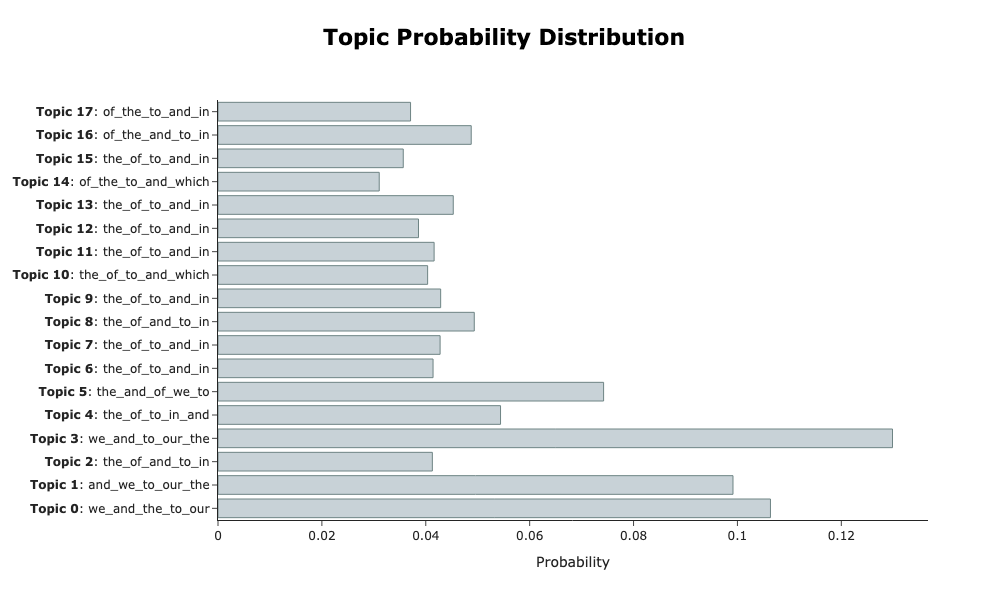

In [25]:
distribution, _ = topic_model.approximate_distribution(docs[0])
topic_dist = topic_model.visualize_distribution(distribution[0])
topic_dist.write_html("outputs/BERtopic_dist")
topic_dist

### Visualizing Topics

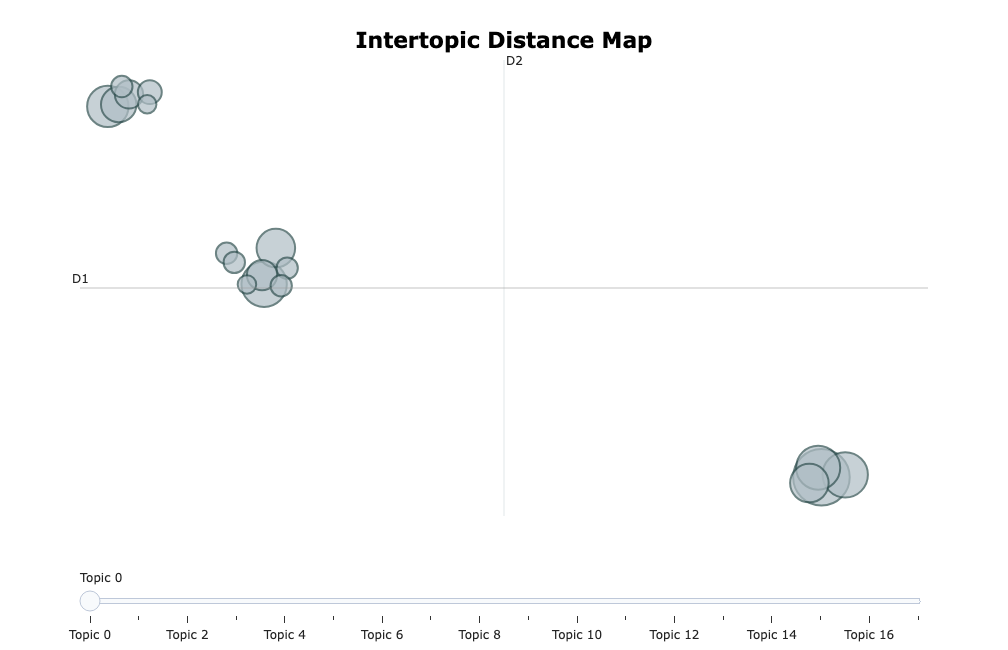

In [28]:
int_topic_dist = topic_model.visualize_topics()
int_topic_dist.write_html("outputs/interactive_BERtopic_distribution")
int_topic_dist